In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split
plt.style.use("seaborn-whitegrid")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
#load the dataset
df_data = pd.read_csv('creditcard.csv')
df_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_data.shape

(284807, 31)

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

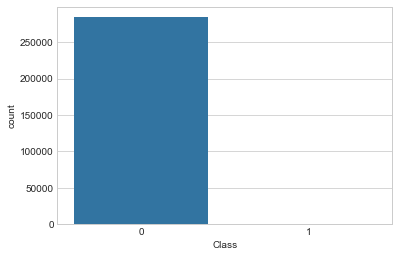

In [6]:
#Distribution of target feature
sns.countplot(df_data['Class'])

In [7]:
df_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This is an imbalanced dataset

In [3]:
## Sepearte dependent and independent features
df_data2 = df_data.copy(deep=True)
X = df_data2.loc[:, df_data2.columns!='Class']
y = df_data2['Class']

In [4]:
X.shape, y.shape

((284807, 30), (284807,))

In [5]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_valid.shape, y_valid.shape)

Train (199364, 30) (199364,)
Test (85443, 30) (85443,)


In [11]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
y_pred=rf.predict(X_valid)

In [13]:
print('Model accuracy score: ',accuracy_score(y_valid,y_pred))

Model accuracy score:  0.9995201479348805


In [14]:
print('Confusion matrix: ')
print(confusion_matrix(y_valid,y_pred))

Confusion matrix: 
[[85291     5]
 [   36   111]]


In [15]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.96      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



## Under sampling

In [16]:
from imblearn.under_sampling import NearMiss

In [17]:
ns = NearMiss()

In [18]:
X_train_ns,y_train_ns = ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 199019, 1: 345})
The number of classes after fit Counter({0: 345, 1: 345})


In [19]:
rf_ns = RandomForestClassifier()
rf_ns.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [20]:
y_pred_ns = rf_ns.predict(X_valid)

In [21]:
print('Model accuracy score: ',accuracy_score(y_valid,y_pred_ns))
print('Confusion matrix: ')
print(confusion_matrix(y_valid,y_pred_ns))
print(classification_report(y_valid,y_pred_ns))

Model accuracy score:  0.6805238580106036
Confusion matrix: 
[[58007 27289]
 [    8   139]]
              precision    recall  f1-score   support

           0       1.00      0.68      0.81     85296
           1       0.01      0.95      0.01       147

    accuracy                           0.68     85443
   macro avg       0.50      0.81      0.41     85443
weighted avg       1.00      0.68      0.81     85443



## Over sampling

In [22]:
from imblearn.over_sampling import RandomOverSampler

In [23]:
os=RandomOverSampler()

In [24]:
X_train_os,y_train_os = os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 199019, 1: 345})
The number of classes after fit Counter({0: 199019, 1: 199019})


In [30]:
#model training
rf_os = RandomForestClassifier()
rf_os.fit(X_train_os, y_train_os)

RandomForestClassifier()

In [31]:
#make prediction
y_pred_os = rf_os.predict(X_valid)

In [32]:
print('Model accuracy score: ',accuracy_score(y_valid,y_pred_os))
print('Confusion matrix: ')
print(confusion_matrix(y_valid,y_pred_os))
print(classification_report(y_valid,y_pred_os))

Model accuracy score:  0.9995318516437859
Confusion matrix: 
[[85290     6]
 [   34   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.77      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



## class_weight

In [36]:
class_weight=dict({0:1,1:500})
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 500})

In [37]:
y_pred=classifier.predict(X_valid)
print(confusion_matrix(y_valid,y_pred))
print(accuracy_score(y_valid,y_pred))
print(classification_report(y_valid,y_pred))

[[85292     4]
 [   37   110]]
0.9995201479348805
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.96      0.75      0.84       147

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



## SMOTETomek

In [10]:
from imblearn.combine import SMOTETomek

In [11]:
smo=SMOTETomek()

In [12]:
X_train_smo,y_train_smo = smo.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smo)))

The number of classes before fit Counter({0: 199019, 1: 345})
The number of classes after fit Counter({0: 198311, 1: 198311})


In [13]:
#model training
rf_smo = RandomForestClassifier()
rf_smo.fit(X_train_smo, y_train_smo)

RandomForestClassifier()

In [14]:
#make prediction
y_pred_smo = rf_smo.predict(X_valid)

In [15]:
print(confusion_matrix(y_valid,y_pred_smo))
print(accuracy_score(y_valid,y_pred_smo))
print(classification_report(y_valid,y_pred_smo))

[[85280    16]
 [   26   121]]
0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.82      0.85       147

    accuracy                           1.00     85443
   macro avg       0.94      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



## SMOTE

In [6]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_smote))

Original dataset shape Counter({0: 199019, 1: 345})
Resample dataset shape Counter({0: 199019, 1: 199019})


In [7]:
#model training
rf_smote = RandomForestClassifier()
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [8]:
#make prediction
y_pred_smote = rf_smote.predict(X_valid)

In [9]:
print(confusion_matrix(y_valid,y_pred_smote))
print(accuracy_score(y_valid,y_pred_smote))
print(classification_report(y_valid,y_pred_smote))

[[85282    14]
 [   26   121]]
0.9995318516437859
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.90      0.82      0.86       147

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



## EasyEnsemle

In [28]:
#from imblearn.ensemble import EasyEnsembleClassifier

In [29]:
'''easy=EasyEnsembleClassifier()
easy.(X_train,y_train)

y_pred=easy.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))'''

'easy=EasyEnsembleClassifier()\neasy.(X_train,y_train)\n\ny_pred=easy.predict(X_test)\nprint(confusion_matrix(y_test,y_pred))\nprint(accuracy_score(y_test,y_pred))\nprint(classification_report(y_test,y_pred))'